In [46]:
!pip install seaborn 

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [48]:
df = pd.read_csv("D:/Harshita/OneDrive_1_24-12-2025/Lab 2/User_Data.csv")
df.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,NaN,19,19000,No
1,15810944,M,35,20000,No
2,15668575,F,26,43000,No
3,15603246,F,27,57000,No
4,15804002,M,19,76000,No


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           382 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    object
dtypes: int64(3), object(2)
memory usage: 15.8+ KB


In [50]:
df.describe()

,User ID,Age,EstimatedSalary
count,4.000000e+02,400.000000,400.000000
mean,1.569154e+07,34.102500,69742.500000
std,7.165832e+04,15.221901,34096.960282
min,1.556669e+07,0.000000,15000.000000
25%,1.562676e+07,27.000000,43000.000000
50%,1.569434e+07,36.000000,70000.000000
75%,1.575036e+07,45.000000,88000.000000
max,1.581524e+07,60.000000,150000.000000


In [51]:
df.isnull().any()

User ID            False
Gender              True
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

In [52]:
df['Gender'].unique()


array([nan, 'M', 'F', '@', '#', '%', '$'], dtype=object)

In [53]:
df['Gender'] = df['Gender'].replace(['@', '#', '%', '$'], pd.NA)

In [54]:
gender_counts = df['Gender'].value_counts(normalize=True)
df['Gender'] = df['Gender'].apply(lambda x: np.random.choice(gender_counts.index, p=gender_counts.values) if pd.isna(x) else x)
print(df)

      User ID Gender  Age  EstimatedSalary Purchased
0    15624510      M   19            19000        No
1    15810944      M   35            20000        No
2    15668575      F   26            43000        No
3    15603246      F   27            57000        No
4    15804002      M   19            76000        No
..        ...    ...  ...              ...       ...
395  15691863      F   46            41000       Yes
396  15706071      M   51            23000       Yes
397  15654296      F   50            20000       Yes
398  15755018      F   36            33000        No
399  15594041      F   49            36000       Yes

[400 rows x 5 columns]


In [55]:
df['Gender'].value_counts()

Gender
F    207
M    193
Name: count, dtype: int64

In [56]:
df['Age'].unique()


array([19, 35, 26, 27, 32, 25, 20, 18,  0, 47, 45, 46, 48, 49, 29, 31, 21,
       28, 33, 30, 23, 24, 59, 22, 34, 39, 38, 37, 42, 36, 40, 41, 58, 55,
       52, 60, 56, 53, 50, 51, 57, 43, 54, 44], dtype=int64)

In [57]:
df['Age'].value_counts()

Age
0     40
35    30
37    18
42    16
26    15
40    14
48    13
39    13
47    13
41    13
46    12
38    12
27    12
28    11
49    10
31    10
36    10
30     9
32     9
33     8
20     7
60     7
24     7
59     7
58     6
19     6
25     6
29     6
53     5
23     5
57     5
18     5
52     5
54     4
50     4
34     4
22     4
45     4
21     4
55     3
51     3
56     2
43     2
44     1
Name: count, dtype: int64

In [58]:
# Using median because distribution is skewed (i.e. the concentration of distribution is more to left)
df['Age'] = df['Age'].replace([0], df['Age'].median())
df['Age'].value_counts()

Age
36    50
35    30
37    18
42    16
26    15
40    14
48    13
39    13
47    13
41    13
46    12
38    12
27    12
28    11
49    10
31    10
30     9
32     9
33     8
20     7
60     7
59     7
24     7
58     6
19     6
25     6
29     6
53     5
23     5
57     5
18     5
52     5
54     4
50     4
34     4
22     4
45     4
21     4
55     3
51     3
56     2
43     2
44     1
Name: count, dtype: int64

In [59]:
purchased_values = df['Purchased'].unique()
print(purchased_values)

['No' 'Yes']


In [60]:
df['Purchased'] = df['Purchased'].map({'No':0, 'Yes':1})
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,F,46,41000,1
396,15706071,M,51,23000,1
397,15654296,F,50,20000,1
398,15755018,F,36,33000,0
399,15594041,F,49,36000,1


In [61]:
df['Purchased'].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [62]:
df['Gender'] = df['Gender'].map({'M': 1, 'F': 0})
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [63]:
df['Gender'].value_counts()

Gender
0    207
1    193
Name: count, dtype: int64

In [64]:
df.drop(columns=['User ID'], inplace=True)


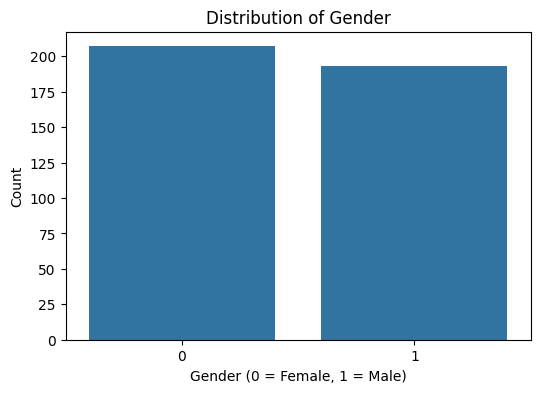

In [65]:
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=df)
plt.title("Distribution of Gender")
plt.xlabel("Gender (0 = Female, 1 = Male)")
plt.ylabel("Count")
plt.show()

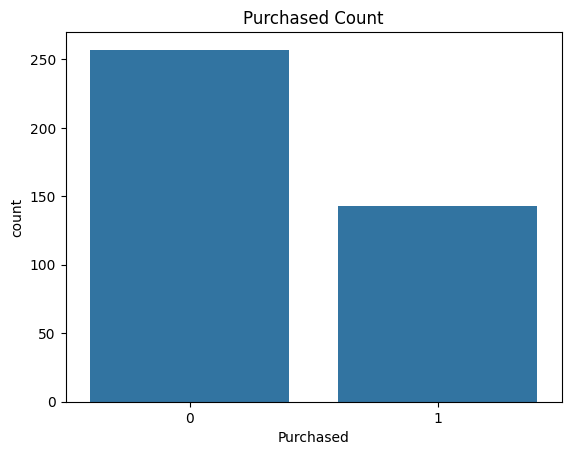

In [66]:
sns.countplot(x='Purchased', data=df)
plt.title("Purchased Count")
plt.show()


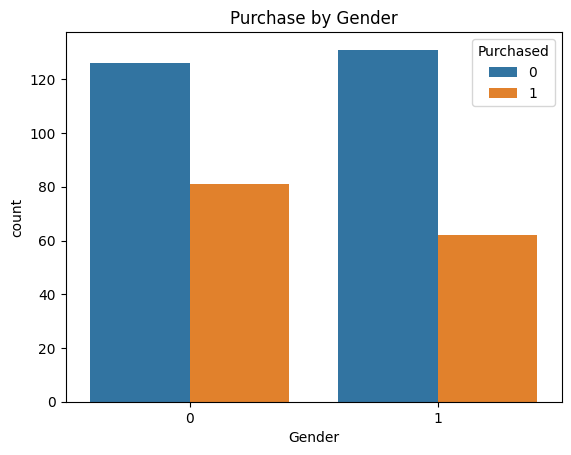

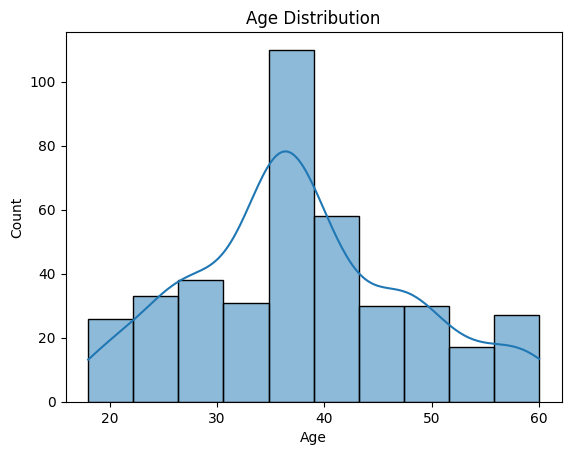

In [67]:
sns.countplot(x='Gender', hue='Purchased', data=df)
plt.title('Purchase by Gender')
plt.show()
sns.histplot(df['Age'], bins=10, kde=True)
plt.title('Age Distribution')
plt.show()

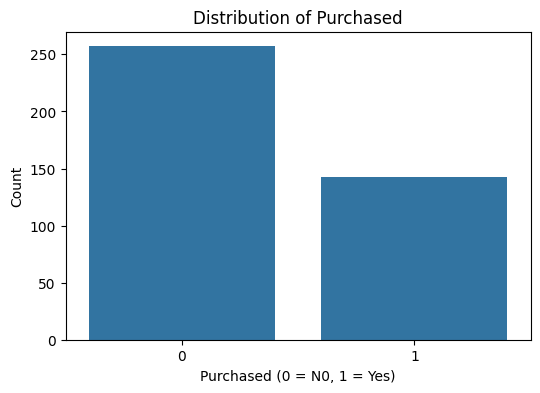

In [68]:
plt.figure(figsize=(6,4))
sns.countplot(x='Purchased', data=df)
plt.title("Distribution of Purchased")
plt.xlabel("Purchased (0 = N0, 1 = Yes)")
plt.ylabel("Count")
plt.show()

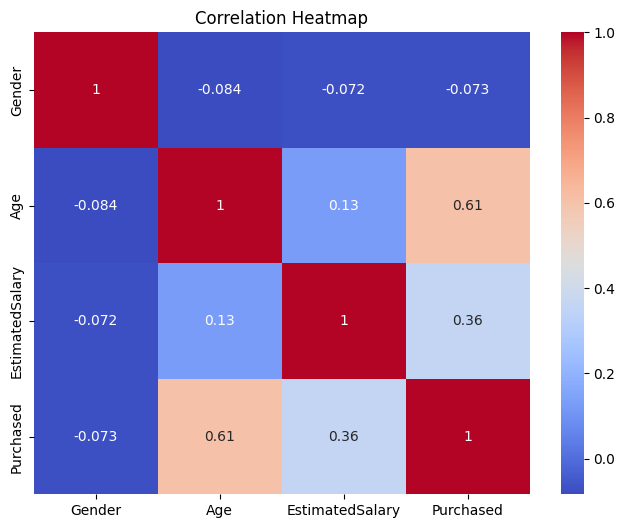

In [70]:
corr_matrix = df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [69]:
#standard
a_mean = df['Age'].mean()
a_std = df['Age'].std()
s_mean = df['EstimatedSalary'].mean()
s_std = df['EstimatedSalary'].std()
df['Age'] = (df['Age'] - a_mean) / a_std
df['EstimatedSalary'] = (df['EstimatedSalary'] - s_mean) / s_std
df.head()


,Gender,Age,EstimatedSalary,Purchased
0,1,-1.847435,-1.488183,0
1,1,-0.266953,-1.458854,0
2,0,-1.155974,-0.784307,0
3,0,-1.057194,-0.373714,0
4,1,-1.847435,0.183521,0


In [72]:
X = df.drop(['Purchased'],axis=1)
Y = df['Purchased']

In [73]:
w = np.zeros((X.shape[1], 1))
b = 0

In [74]:
# sigmoid function
def sigmoid(z):
    return 1 /(1 + np.exp(-z))

In [75]:
# Cost function
def calc_cost(Y, y_pred):
    m = Y.shape[0]
    cost = - (1/m) * np.sum(Y * np.log(y_pred + 1e-4) + (1 - Y) * np.log(1 - y_pred + 1e-4))
    return cost

In [76]:
# Gradient Descent
def gradient_descent(X, Y, w, b, learning_rate, epochs):
    m = X.shape[0]
    costs = []

    for i in range(epochs):
        # Linear function
        z = np.dot(X, w) + b
        y_pred = sigmoid(z)

        # Compute cost
        cost = calc_cost(Y, y_pred)

        # Gradients
        dw = (1/m) * np.dot(X.T, (y_pred - Y))
        db = (1/m) * np.sum(y_pred - Y)

        # Update parameters
        w = w - learning_rate * dw
        b = b - learning_rate * db

        if i % 100 == 0:
            costs.append(cost)
            print(f"Epoch {i}, Cost: {cost}")

    return w, b, costs

In [77]:
w, b, costs = gradient_descent(X.values, Y.values.reshape(-1, 1), w, b, learning_rate=0.1, epochs=1000)

print("Final weights:\n", w)
print("Final bias:", b)

Epoch 0, Cost: 0.6929472005572793
Epoch 100, Cost: 0.3919974701822443
Epoch 200, Cost: 0.3668819052726714
Epoch 300, Cost: 0.3590717979964121
Epoch 400, Cost: 0.3556655613197268
Epoch 500, Cost: 0.3539156817376647
Epoch 600, Cost: 0.3529256651953252
Epoch 700, Cost: 0.35232969060947705
Epoch 800, Cost: 0.35195558603743976
Epoch 900, Cost: 0.35171381413882374
Final weights:
 [[0.05070274]
 [2.35497607]
 [1.23851171]]
Final bias: -1.085389871867152


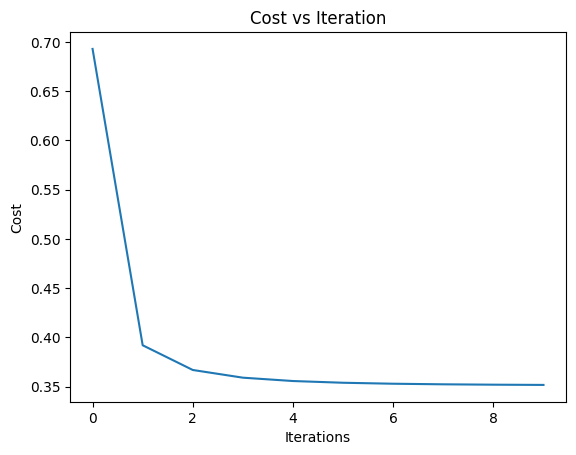

In [78]:
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iteration')
plt.show()

In [79]:
# Prediction function
def predict(X, w, b):
    z = np.dot(X, w) + b
    y_pred = sigmoid(z)
    y_pred = (y_pred >= 0.5).astype(int)
    return y_pred

# Make predictions on the training data
y_pred_train = predict(X.values, w, b)

# Display the predictions
print("Predictions on training data:\n", y_pred_train.tolist())

Predictions on training data:
 [[0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [1], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0]

In [80]:
def calculate_accuracy(y_true, y_pred):
    correct_predictions = 0
    for i in range(len(y_true)):
        if y_true[i] == y_pred[i]:
            correct_predictions += 1
    accuracy = correct_predictions / len(y_true)
    return accuracy

Y_reshaped = Y.values.reshape(-1, 1)

accuracy_train = calculate_accuracy(Y_reshaped, y_pred_train)
print(f"Accuracy on training data: {accuracy_train:.4f}")

test_loss = calc_cost(Y_reshaped, y_pred_train)
print(f"Test Loss: {test_loss:.4f}")

Accuracy on training data: 0.8500
Test Loss: 1.3815


In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create and fit model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred_sklearn_train = model.predict(X_train)
y_pred_sklearn_test = model.predict(X_test)

# Accuracy and Loss for training data
print("Sklearn Train Accuracy:", accuracy_score(y_train, y_pred_sklearn_train))
print("Sklearn Train Loss:", log_loss(y_train, y_pred_sklearn_train))

# Accuracy and Loss for test data
print("Sklearn Test Accuracy:", accuracy_score(y_test, y_pred_sklearn_test))
print("Sklearn Test Loss:", log_loss(y_test, y_pred_sklearn_test))

print("w = ", model.coef_)
print("b = ", model.intercept_)

Sklearn Train Accuracy: 0.8375
Sklearn Train Loss: 5.857093675731537
Sklearn Test Accuracy: 0.8875
Sklearn Test Loss: 4.054911006275679
w =  [[0.09145121 2.05980322 1.19950084]]
b =  [-1.08073145]
